In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import os

#from enigmatoolbox.utils.parcellation import parcel_to_surface
from neuromaps.datasets import fetch_fslr, fetch_annotation
from neuromaps.transforms import mni152_to_fslr
from neuromaps.parcellate import Parcellater
from neuromaps.images import dlabel_to_gifti
from surfplot import Plot
from brainspace.datasets import load_parcellation
from netneurotools import datasets as nntdata

def parcel_to_surface(source_val, parc_name='schaefer', scale=200):
    # Load parcellation
    lh_parc, rh_parc = load_parcellation(parc_name, scale=scale)

    # Project parcel to surface
    lh_source, rh_source = source_val[lh_parc-1], source_val[rh_parc-1]

    # Remove medial wall
    lh_source[lh_parc == 0] = np.nan
    rh_source[rh_parc == 0] = np.nan

    # Return surface data
    return lh_source, rh_source

#folder_main = 'Stroke_connectomes_analysis/'
folder_main = './'
folder_figures = folder_main + 'figures/'
folder_results = folder_main + 'results/'

# Average local dimension

In [2]:
### Define params
N = 200
surface_space = 'conte69'#'fslr'

In [6]:
### Load data
data = np.load(folder_results+f'dimensionality/dim_local_avg_N_{N}.npy')

### From parcellated to surface space
#CT_schaefer = parcel_to_surface(data, f'schaefer_{N}_{surface_space}')
#data_lh, data_rh = CT_schaefer[:len(CT_schaefer)//2], CT_schaefer[len(CT_schaefer)//2:]
data_lh, data_rh = parcel_to_surface(data)

### Load surface
surfaces = fetch_fslr()
print(surfaces.keys())
lh, rh = surfaces['veryinflated']

dict_keys(['midthickness', 'inflated', 'veryinflated', 'sphere', 'medial', 'sulc', 'vaavg'])


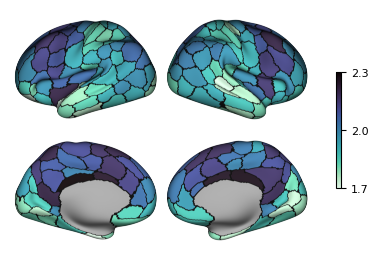

In [8]:
### Plot
# Plot surface
p = Plot(lh, rh)

# add data
lh_parc, rh_parc = load_parcellation('schaefer', scale=200)
#p.add_layer({'left': lh_parc, 'right': rh_parc}, cbar=False)
p.add_layer({'left': data_lh, 'right': data_rh}, cbar=True, cbar_label=None, cmap='mako_r')
#p._add_colorbars(location='right', label_direction=None, n_ticks=3, decimals=2, fontsize=10, draw_border=True, outer_labels_only=False, aspect=20, pad=0.08, shrink=0.3, fraction=0.05)

# Add schaefer parcellation
p.add_layer({'left': lh_parc, 'right': rh_parc}, cmap='gray',
            as_outline=True, cbar=False)
fig = p.build(scale=(10, 10), colorbar=True, cbar_kws={'location': 'right', 'decimals': 1, 'fraction': 0.3, 'fontsize': 8, 'pad': 0.05, 'label_direction': 0})

plt.savefig(folder_figures+f'fig_dim_local_avg_N_{N}.png', bbox_inches='tight', dpi=500)
plt.show()

# Myelin

In [9]:
from neuromaps.datasets import fetch_annotation, available_annotations
from neuromaps.parcellate import Parcellater
from neuromaps.images import dlabel_to_gifti
from neuromaps.transforms import fslr_to_fslr

from netneurotools import datasets as nntdata

In [6]:
available_annotations()

[('abagen', 'genepc1', 'fsaverage', '10k'),
 ('aghourian2017', 'feobv', 'MNI152', '1mm'),
 ('alarkurtti2015', 'raclopride', 'MNI152', '3mm'),
 ('bedard2019', 'feobv', 'MNI152', '1mm'),
 ('beliveau2017', 'az10419369', 'MNI152', '1mm'),
 ('beliveau2017', 'az10419369', 'fsaverage', '164k'),
 ('beliveau2017', 'cimbi36', 'MNI152', '1mm'),
 ('beliveau2017', 'cimbi36', 'fsaverage', '164k'),
 ('beliveau2017', 'cumi101', 'MNI152', '1mm'),
 ('beliveau2017', 'cumi101', 'fsaverage', '164k'),
 ('beliveau2017', 'dasb', 'MNI152', '1mm'),
 ('beliveau2017', 'dasb', 'fsaverage', '164k'),
 ('beliveau2017', 'sb207145', 'MNI152', '1mm'),
 ('beliveau2017', 'sb207145', 'fsaverage', '164k'),
 ('ding2010', 'mrb', 'MNI152', '1mm'),
 ('dubois2015', 'abp688', 'MNI152', '1mm'),
 ('dukart2018', 'flumazenil', 'MNI152', '3mm'),
 ('dukart2018', 'fpcit', 'MNI152', '3mm'),
 ('fazio2016', 'madam', 'MNI152', '3mm'),
 ('finnema2016', 'ucbj', 'MNI152', '1mm'),
 ('gallezot2010', 'p943', 'MNI152', '1mm'),
 ('gallezot2017', 'g

In [10]:
parc = 200

### Download maps
myelinmap = fetch_annotation(source='hcps1200', desc='myelinmap')

### Download parcellation
schaefer = nntdata.fetch_schaefer2018('fslr32k')[f'{parc}Parcels7Networks']

### Create parcellator
parcellator = Parcellater(dlabel_to_gifti(schaefer), 'fsLR')

### Parcellate
myelin_parc = parcellator.fit_transform(myelinmap, 'fsLR', ignore_background_data=True)

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


Please cite the following papers if you are using this function:
  [primary]:
    Alexander Schaefer, Ru Kong, Evan M Gordon, Timothy O Laumann, Xi-Nian Zuo, Avram J Holmes, Simon B Eickhoff, and BT Thomas Yeo. Local-global parcellation of the human cerebral cortex from intrinsic functional connectivity mri. Cerebral cortex, 28(9):3095–3114, 2018.
Dataset atl-schaefer2018 already exists. Skipping download.


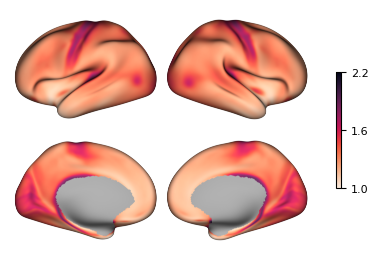

In [11]:
### Plot
# Plot surface
p = Plot(lh, rh)

# add data
p.add_layer({'left': myelinmap[0], 'right': myelinmap[1]}, cbar=True, cbar_label=None, cmap='rocket_r')
#p._add_colorbars(location='right', label_direction=None, n_ticks=3, decimals=2, fontsize=10, draw_border=True, outer_labels_only=False, aspect=20, pad=0.08, shrink=0.3, fraction=0.05)

# Add schaefer parcellation
#p.add_layer({'left': lh_parc, 'right': rh_parc}, cmap='gray',as_outline=True, cbar=False)
fig = p.build(scale=(10, 10), colorbar=True, cbar_kws={'location': 'right', 'decimals': 1, 'fraction': 0.3, 'fontsize': 8, 'pad': 0.05})

plt.savefig(f'fig_myelin_N_{N}.png', bbox_inches='tight', dpi=500)
plt.show()

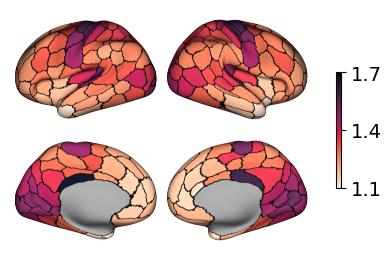

In [12]:
### Plot
# Plot surface
p = Plot(lh, rh)

### From parcellated to surface space
data_lh, data_rh = parcel_to_surface(myelin_parc)

# add data
lh_parc, rh_parc = load_parcellation('schaefer', scale=200)
#p.add_layer({'left': lh_parc, 'right': rh_parc}, cbar=False)
p.add_layer({'left': data_lh, 'right': data_rh}, cbar=True, cbar_label=None, cmap='rocket_r')
#p._add_colorbars(location='right', label_direction=None, n_ticks=3, decimals=2, fontsize=10, draw_border=True, outer_labels_only=False, aspect=20, pad=0.08, shrink=0.3, fraction=0.05)

# Add schaefer parcellation
p.add_layer({'left': lh_parc, 'right': rh_parc}, cmap='gray',
            as_outline=True, cbar=False)
fig = p.build(scale=(10, 10), colorbar=True, cbar_kws={'location': 'right', 'decimals': 1, 'fraction': 0.3, 'fontsize': 14, 'pad': 0.05})
plt.savefig(folder_figures+f'fig_myelin_N_{N}.png', bbox_inches='tight', dpi=500)
plt.show()

# Evolutionary expansion

In [31]:
parc = 200
hemi = None#'R'

### Download maps
evoexp = fetch_annotation(source='hill2010', desc='devexp')
evoexp = [evoexp, evoexp]

### Resample
evoexp = fslr_to_fslr(evoexp, hemi=hemi)

### Download parcellation
schaefer = nntdata.fetch_schaefer2018('fslr32k')[f'{parc}Parcels7Networks']

### Create parcellator
parcellator = Parcellater(dlabel_to_gifti(schaefer), 'fsLR', hemi=hemi)

### Parcellate
evoexp_parc = parcellator.fit_transform(evoexp, 'fsLR', ignore_background_data=True, hemi=hemi)

 ...done. (3 seconds, 0 min)
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


In [34]:
np.corrcoef(evoexp_parc[100:], data[100:])

array([[1.        , 0.16091298],
       [0.16091298, 1.        ]])

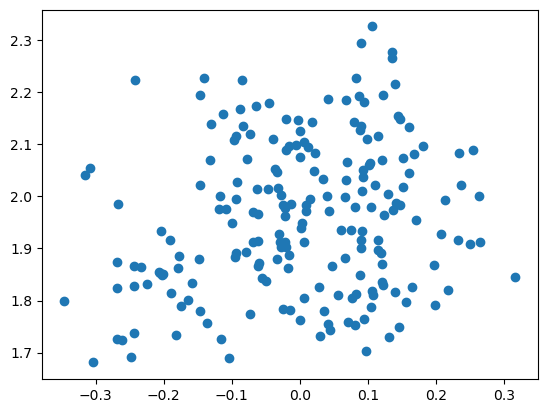

In [35]:
plt.plot(evoexp_parc, data, 'o')
plt.show()

# XZ-coordinates

In [13]:
### Load Schaefer parcellation ROIS
rois = pd.read_csv('/data/barzon/arm2/templates/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_1mm.Centroid_RAS.csv')

# Get coordinates
x = rois['R'].values.astype(float)
z = rois['S'].values.astype(float)

# add small values to z to avoid being zero
z[np.where(z==0)[0]] = 0.001

# Get RSNs
rsn = rois['ROI Name'].str.split('_', expand=True)[2].values
print(np.unique(rsn))

order = np.array( ['Cont', 'SalVentAttn', 'DorsAttn', 'Default', 'SomMot', 'Vis', 'Limbic'] )

rsn_id = [np.where(order == r)[0][0] for r in rsn]
rsn_id = np.array(rsn_id) +1

['Cont' 'Default' 'DorsAttn' 'Limbic' 'SalVentAttn' 'SomMot' 'Vis']


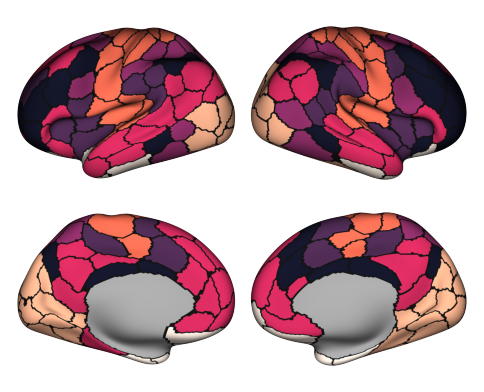

In [25]:
### Plot
# Plot surface
p = Plot(lh, rh)

### From parcellated to surface space
data_lh, data_rh = parcel_to_surface(rsn_id.astype(float))

# add data
lh_parc, rh_parc = load_parcellation('schaefer', scale=200)
#p.add_layer({'left': lh_parc, 'right': rh_parc}, cbar=False)
p.add_layer({'left': data_lh, 'right': data_rh}, cbar=False, cbar_label=None, cmap='rocket')
#p._add_colorbars(location='right', label_direction=None, n_ticks=3, decimals=2, fontsize=10, draw_border=True, outer_labels_only=False, aspect=20, pad=0.08, shrink=0.3, fraction=0.05)

# Add schaefer parcellation
p.add_layer({'left': lh_parc, 'right': rh_parc}, cmap='gray',
            as_outline=True, cbar=False)
fig = p.build(scale=(10, 10), colorbar=True, cbar_kws={'location': 'right', 'decimals': 1, 'fraction': 0.3, 'fontsize': 8, 'pad': 0.05})
plt.savefig(folder_figures+f'fig_rsn_N_{N}.png', bbox_inches='tight', dpi=500)
plt.show()

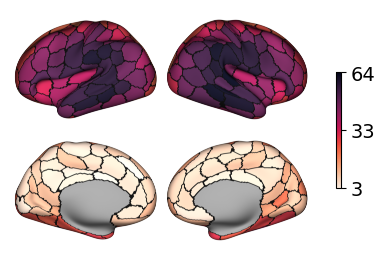

In [26]:
### Plot
# Plot surface
p = Plot(lh, rh)

### From parcellated to surface space
data_lh, data_rh = parcel_to_surface(np.abs(x))

# add data
lh_parc, rh_parc = load_parcellation('schaefer', scale=200)
p.add_layer({'left': data_lh, 'right': data_rh}, cbar=True, cbar_label=None, cmap='rocket_r')
#p._add_colorbars(location='right', label_direction=None, n_ticks=3, decimals=2, fontsize=10, draw_border=True, outer_labels_only=False, aspect=20, pad=0.08, shrink=0.3, fraction=0.05)

# Add schaefer parcellation
p.add_layer({'left': lh_parc, 'right': rh_parc}, cmap='gray',
            as_outline=True, cbar=False)
fig = p.build(scale=(10, 10), colorbar=True, cbar_kws={'location': 'right', 'decimals': 0, 'fraction': 0.3, 'fontsize': 14, 'pad': 0.05})
plt.savefig(folder_figures+f'fig_medial_lateral_N_{N}.png', bbox_inches='tight', dpi=500)
plt.show()

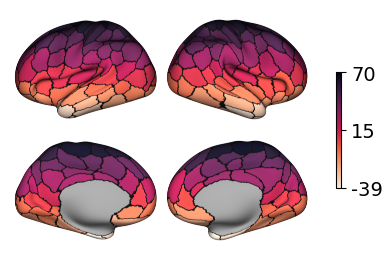

In [29]:
### Plot
# Plot surface
p = Plot(lh, rh)

### From parcellated to surface space
data_lh, data_rh = parcel_to_surface(z)

# add data
lh_parc, rh_parc = load_parcellation('schaefer', scale=200)
p.add_layer({'left': data_lh, 'right': data_rh}, cbar=True, cbar_label=None, cmap='rocket_r')
#p._add_colorbars(location='right', label_direction=None, n_ticks=3, decimals=2, fontsize=10, draw_border=True, outer_labels_only=False, aspect=20, pad=0.08, shrink=0.3, fraction=0.05)

# Add schaefer parcellation
p.add_layer({'left': lh_parc, 'right': rh_parc}, cmap='gray',
            as_outline=True, cbar=False)
fig = p.build(scale=(10, 10), colorbar=True, cbar_kws={'location': 'right', 'decimals': 0, 'fraction': 0.3, 'fontsize': 14, 'pad': 0.05})
plt.savefig(folder_figures+f'fig_ventral_dorsal_N_{N}.png', bbox_inches='tight', dpi=500)
plt.show()

# Delta-dimensionality Stroke

In [6]:
# Load lesion map - two subjects
data_dir = '/data/barzon/arm2/'
lesions = [data_dir + fname for fname in os.listdir(data_dir) if '.nii' in fname]
print(lesions)

['/data/barzon/arm2/FCS_268_A_r33_lesion_111_MNI152.nii', '/data/barzon/arm2/FCS_277_A_r33_lesion_111_MNI152.nii']


In [8]:
folder = 'results/dimensionality/'

fnames = [files for files in os.listdir(folder) if 'delta_dim_sub' in files]
fnames = [files for files in fnames if '.npy' in files]
subj_names = [files.split('_')[2] for files in fnames]
deltas = [np.load(folder+fname) for fname in fnames]

### Load data
np.argsort([delta.max() for delta in deltas])[::-1]

# 19: lesion on left side, very visible
# 25: right side
# 26, 39: very spread
# 35: frontal

array([35, 34, 38, 48, 40, 26, 24, 10,  9, 22,  4, 27, 39, 29, 20, 31, 19,
       41, 32,  1, 33, 21, 16, 44, 15, 36, 12, 23, 47, 25, 30, 28,  8,  0,
       42,  5, 14,  6, 17,  2, 43, 11,  3, 49, 45,  7, 18, 46, 13, 37])

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


Please cite the following papers if you are using this function:
  [primary]:
    Alexander Schaefer, Ru Kong, Evan M Gordon, Timothy O Laumann, Xi-Nian Zuo, Avram J Holmes, Simon B Eickhoff, and BT Thomas Yeo. Local-global parcellation of the human cerebral cortex from intrinsic functional connectivity mri. Cerebral cortex, 28(9):3095–3114, 2018.
Dataset atl-schaefer2018 already exists. Skipping download.
dict_keys(['midthickness', 'inflated', 'veryinflated', 'sphere', 'medial', 'sulc', 'vaavg'])


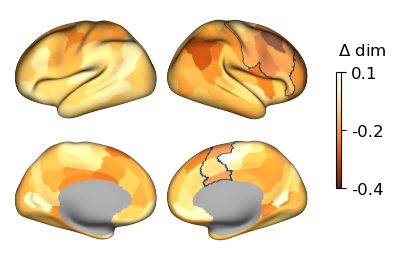

In [16]:
idx = -8
delta = deltas[idx].copy()
#print(delta)
#delta[delta>0] = 1e-8
#print(delta)

N = 200

### From parcellated to surface space
#CT_schaefer = parcel_to_surface(delta, f'schaefer_{N}_{surface_space}')
#data_lh, data_rh = CT_schaefer[:len(CT_schaefer)//2], CT_schaefer[len(CT_schaefer)//2:]
data_lh, data_rh = parcel_to_surface(delta)

# Project volume to surface
lh_lesion, rh_lesion = mni152_to_fslr(lesions[0], '32k')

### Download parcellation
schaefer = nntdata.fetch_schaefer2018('fslr32k')[f'{N}Parcels7Networks']

### Create parcellator
parcellator = Parcellater(dlabel_to_gifti(schaefer), 'fsLR')

### Parcellate
lesion_parc = parcellator.fit_transform([lh_lesion, rh_lesion], 'fsLR', ignore_background_data=True)
lesion_parc = (lesion_parc>0.5).astype(float)

# Project volume to surface
lh_lesion, rh_lesion = parcel_to_surface(lesion_parc)

### Load surface
surfaces = fetch_fslr()
print(surfaces.keys())
lh, rh = surfaces['veryinflated']

### Plot
# Plot surface
p = Plot(lh, rh)

# add data
lh_parc, rh_parc = load_parcellation('schaefer', scale=200)
#p.add_layer({'left': lh_parc, 'right': rh_parc}, cbar=False)
p.add_layer({'left': data_lh, 'right': data_rh}, cbar=True, cbar_label=r'$\Delta$ dim', cmap='YlOrBr_r')

#p._add_colorbars(location='right', label_direction=None, n_ticks=3, decimals=2, fontsize=10, draw_border=True, outer_labels_only=False, aspect=20, pad=0.08, shrink=0.3, fraction=0.05)

# Add schaefer parcellation
#p.add_layer({'left': lh_parc, 'right': rh_parc}, cmap='gray', as_outline=True, cbar=False)

# add lesion
p.add_layer({'left': lh_lesion, 'right': rh_lesion}, cbar=False, as_outline=False, cmap='Greys', alpha=0.2)
p.add_layer({'left': lh_lesion, 'right': rh_lesion}, cbar=False, as_outline=True, cmap='Blues', alpha=1)

fig = p.build(scale=(10, 10), colorbar=True, cbar_kws={'location': 'right', 'label_direction': 'horizontal', 'decimals': 1, 'fraction': 0.3, 'fontsize': 12, 'pad': 0.05})
#plt.savefig(f'fig_dim_delta_{subj_names[idx]}_N_{N}.png', bbox_inches='tight', pad_inches=0, dpi=500)
plt.show()

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


Please cite the following papers if you are using this function:
  [primary]:
    Alexander Schaefer, Ru Kong, Evan M Gordon, Timothy O Laumann, Xi-Nian Zuo, Avram J Holmes, Simon B Eickhoff, and BT Thomas Yeo. Local-global parcellation of the human cerebral cortex from intrinsic functional connectivity mri. Cerebral cortex, 28(9):3095–3114, 2018.
Dataset atl-schaefer2018 already exists. Skipping download.
dict_keys(['midthickness', 'inflated', 'veryinflated', 'sphere', 'medial', 'sulc', 'vaavg'])


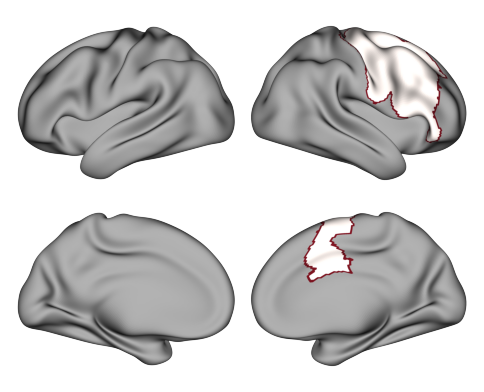

In [118]:
idx = -8
delta = deltas[idx].copy()
#print(delta)
#delta[delta>0] = 1e-8
#print(delta)

N = 200

### From parcellated to surface space
#CT_schaefer = parcel_to_surface(delta, f'schaefer_{N}_{surface_space}')
#data_lh, data_rh = CT_schaefer[:len(CT_schaefer)//2], CT_schaefer[len(CT_schaefer)//2:]
data_lh, data_rh = parcel_to_surface(delta)

# Project volume to surface
lh_lesion, rh_lesion = mni152_to_fslr(lesions[0], '32k')

### Download parcellation
schaefer = nntdata.fetch_schaefer2018('fslr32k')[f'{N}Parcels7Networks']

### Create parcellator
parcellator = Parcellater(dlabel_to_gifti(schaefer), 'fsLR')

### Parcellate
lesion_parc = parcellator.fit_transform([lh_lesion, rh_lesion], 'fsLR', ignore_background_data=True)
lesion_parc = (lesion_parc>0.5).astype(float)

# Project volume to surface
lh_lesion, rh_lesion = parcel_to_surface(lesion_parc)

### Load surface
surfaces = fetch_fslr()
print(surfaces.keys())
lh, rh = surfaces['inflated']

### Plot
# Plot surface
p = Plot(lh, rh)

# add data
lh_parc, rh_parc = load_parcellation('schaefer', scale=N)
#p.add_layer({'left': lh_parc, 'right': rh_parc}, cbar=False)
#p.add_layer({'left': data_lh, 'right': data_rh}, cbar=True, cbar_label=r'$\Delta$ dim', cmap='YlOrBr_r')

#p._add_colorbars(location='right', label_direction=None, n_ticks=3, decimals=2, fontsize=10, draw_border=True, outer_labels_only=False, aspect=20, pad=0.08, shrink=0.3, fraction=0.05)

# Add schaefer parcellation
#p.add_layer({'left': lh_parc, 'right': rh_parc}, cmap='gray', as_outline=True, cbar=False)

# Add lesion
p.add_layer({'left': lh_lesion, 'right': rh_lesion}, cbar=False, as_outline=False, cmap='Reds', alpha=1)
p.add_layer({'left': lh_lesion, 'right': rh_lesion}, cbar=False, as_outline=True, cmap='Reds', alpha=1)

fig = p.build(scale=(10, 10), colorbar=True, cbar_kws={'location': 'right', 'label_direction': 'horizontal', 'decimals': 1, 'fraction': 0.3, 'fontsize': 12, 'pad': 0.05})
#plt.savefig(f'fig_dim_delta_{subj_names[idx]}_N_{N}.png', bbox_inches='tight', pad_inches=0, dpi=500)
plt.show()

dict_keys(['midthickness', 'inflated', 'veryinflated', 'sphere', 'medial', 'sulc', 'vaavg'])


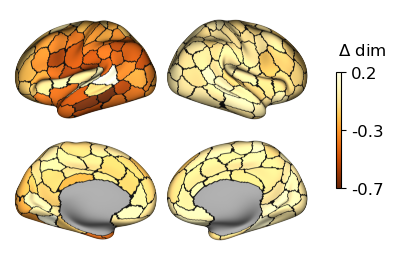

In [9]:
idx = -2
delta = deltas[idx].copy()
#print(delta)
#delta[delta>0] = 1e-8
#print(delta)

### From parcellated to surface space
#CT_schaefer = parcel_to_surface(delta, f'schaefer_{N}_{surface_space}')
#data_lh, data_rh = CT_schaefer[:len(CT_schaefer)//2], CT_schaefer[len(CT_schaefer)//2:]
data_lh, data_rh = parcel_to_surface(delta)

# Project volume to surface
lh_lesion, rh_lesion = mni152_to_fslr(lesions[-1], '32k')

### Load surface
surfaces = fetch_fslr()
print(surfaces.keys())
lh, rh = surfaces['veryinflated']

### Plot
# Plot surface
p = Plot(lh, rh)

# add data
lh_parc, rh_parc = load_parcellation('schaefer', scale=200)
#p.add_layer({'left': lh_parc, 'right': rh_parc}, cbar=False)
p.add_layer({'left': data_lh, 'right': data_rh}, cbar=True, cbar_label=r'$\Delta$ dim', cmap='YlOrBr_r')
#p._add_colorbars(location='right', label_direction=None, n_ticks=3, decimals=2, fontsize=10, draw_border=True, outer_labels_only=False, aspect=20, pad=0.08, shrink=0.3, fraction=0.05)

# add lesion
#p.add_layer({'left': lh_lesion, 'right': rh_lesion}, cbar=False, as_outline=False, cmap='Greys', alpha=0.2)
#p.add_layer({'left': lh_lesion, 'right': rh_lesion}, cbar=False, as_outline=True, cmap='BuPu', alpha=1)

# Add schaefer parcellation
p.add_layer({'left': lh_parc, 'right': rh_parc}, cmap='gray', as_outline=True, cbar=False)

fig = p.build(scale=(10, 10), colorbar=True, cbar_kws={'location': 'right', 'label_direction': 'horizontal', 'decimals': 1, 'fraction': 0.3, 'fontsize': 12, 'pad': 0.05})

plt.savefig(f'figures/fig_dim_delta_{subj_names[idx]}_N_{N}.png', bbox_inches='tight', pad_inches=0, dpi=500)
plt.show()

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


Please cite the following papers if you are using this function:
  [primary]:
    Alexander Schaefer, Ru Kong, Evan M Gordon, Timothy O Laumann, Xi-Nian Zuo, Avram J Holmes, Simon B Eickhoff, and BT Thomas Yeo. Local-global parcellation of the human cerebral cortex from intrinsic functional connectivity mri. Cerebral cortex, 28(9):3095–3114, 2018.
Dataset atl-schaefer2018 already exists. Skipping download.
dict_keys(['midthickness', 'inflated', 'veryinflated', 'sphere', 'medial', 'sulc', 'vaavg'])


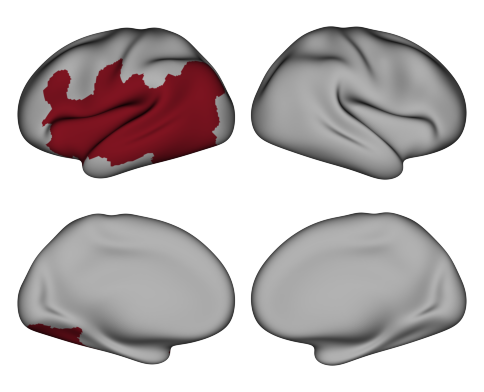

In [18]:
idx = -2
delta = deltas[idx].copy()
#print(delta)
#delta[delta>0] = 1e-8
#print(delta)

### From parcellated to surface space
#CT_schaefer = parcel_to_surface(delta, f'schaefer_{N}_{surface_space}')
#data_lh, data_rh = CT_schaefer[:len(CT_schaefer)//2], CT_schaefer[len(CT_schaefer)//2:]
data_lh, data_rh = parcel_to_surface(delta)

# Project volume to surface
lh_lesion, rh_lesion = mni152_to_fslr(lesions[-1], '32k')

### Download parcellation
schaefer = nntdata.fetch_schaefer2018('fslr32k')[f'{N}Parcels7Networks']

### Create parcellator
parcellator = Parcellater(dlabel_to_gifti(schaefer), 'fsLR')

### Parcellate
lesion_parc = parcellator.fit_transform([lh_lesion, rh_lesion], 'fsLR', ignore_background_data=True)
lesion_parc = (lesion_parc>0.78).astype(float)

# Project volume to surface
lh_lesion, rh_lesion = parcel_to_surface(lesion_parc)

### Load surface
surfaces = fetch_fslr()
print(surfaces.keys())
lh, rh = surfaces['veryinflated']

### Plot
# Plot surface
p = Plot(lh, rh)

# add data
lh_parc, rh_parc = load_parcellation('schaefer', scale=200)
#p.add_layer({'left': lh_parc, 'right': rh_parc}, cbar=False)
#p.add_layer({'left': data_lh, 'right': data_rh}, cbar=True, cbar_label=r'$\Delta$ dim', cmap='YlOrBr_r')
#p._add_colorbars(location='right', label_direction=None, n_ticks=3, decimals=2, fontsize=10, draw_border=True, outer_labels_only=False, aspect=20, pad=0.08, shrink=0.3, fraction=0.05)

# add lesion
p.add_layer({'left': lh_lesion, 'right': rh_lesion}, cbar=False, as_outline=False, cmap='Reds_r', alpha=1)
#p.add_layer({'left': lh_lesion, 'right': rh_lesion}, cbar=False, as_outline=True, cmap='Reds', alpha=1)

# Add schaefer parcellation
#p.add_layer({'left': lh_parc, 'right': rh_parc}, cmap='gray', as_outline=True, cbar=False)

fig = p.build(scale=(10, 10), colorbar=True, cbar_kws={'location': 'right', 'label_direction': 'horizontal', 'decimals': 1, 'fraction': 0.3, 'fontsize': 12, 'pad': 0.05})

plt.savefig(f'figures/fig_lesion_{subj_names[idx]}_N_{N}.png', bbox_inches='tight', pad_inches=0, dpi=500)
plt.show()